### Deep Learning - Dr. Xingquan (Hill) Zhu
### Assignment 2 
### Hsin Ting Ho (Z#23500922)

#### Question 1 [0.5 pt]
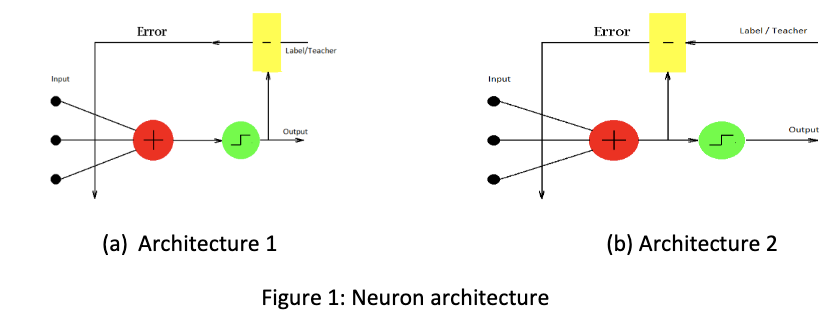

#### Figure 1 shows neuron architectures used for perceptron learning rule and gradient descent learning rule training. 
#### (1) Explain why which one is used for perceptron learning rule, and which one is used for gradient descent learning rule? 
>(a) Architecture 1 is used for gradient decent learning rule training. The local field is funneled through the activation function regardless the output of summing function which inidates this architecture adjust its weights even when a correct prediction is made.

>(b) Architecture 2 is used for perceptron learning rule training. The architecture suggests that the weighs changes are made according to the result of the summing function. In other word, no learning takes place when a correct prediction is made which is one of characteristics of perceptron learning rule.

#### (2) what is the minimization objective of (a) and (b), respectively? 
>(a) minimizes squared error while (b) minimizes the number of misclassification.

#### (3) what does the “Error” in (a) and (b) represent, respectively?
>In (a), 'Error' represents mean squared error. In (b), 'Error' represents incorrect prediction.

#### Question 2[1pt]
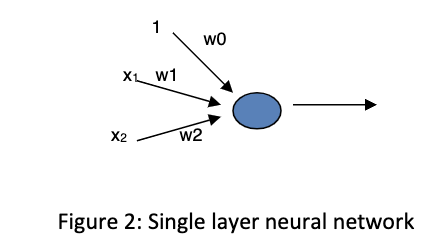

#### Figure 2 shows a single layer neural network with three weight values (including bias). Given a training instance x(n), assume desired label of the instance is d(n), please define the squared error of the instance with respect to the network [0.5 pt]. 
>o(n) = $\sum_{i=0}^{2}wi(k)*xi(n)$

>E(w0, w1, w2) = $\frac{1}{2}\sum_{}^{}(d(n)-o(n))^2$

#### Please use gradient descent learning to derive weight updating rules for w0, w1, and w2, respectively [0.5 pt]

> - Δwi = Δwi + η(d(n)-o(n))*xi(n)
> - wi(k+1) = wi(k)+Δwi

Therefore,
> - w0(k+1) = w0(k) + Δw0 + η(d(n)-o(n))*x0(n)
> - w1(k+1) = w1(k) + Δw1 + η(d(n)-o(n))*x1(n)
> - w2(k+1) = w2(k) + Δw2 + η(d(n)-o(n))*x2(n)

#### Question 3[1 pt]:
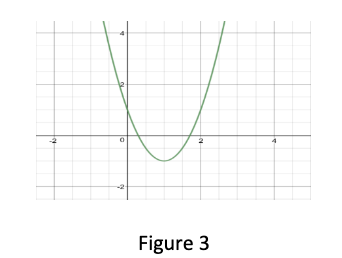


#### The following figure shows a quadratic function $y=2x^2-4x+1$. Assume we are at the point (2,1), and is searching for the next movement to find the minimum value of the quadratic function using gradient descent (the learning rate is 0.1). 

* What is the gradient at point (2,1)? (Show your solutions)[0.5 pt] 
> $y=2x^2-4x+1$ <br>
> => d(y) = 4x-4 <br>
> x = 2, learning rate = 0.1 <br>
> => gradient = (4 * 2 - 4)*0.1 = 0.4 <br>
* Following gradient decent principle, find the next movement towards the global minimum [0.5 pt]
> Next movement = -0.4

#### Question 4[2pts]
#### Assuming we have two sets of instances, which belong to two classes, with each class containingthree instances. 
- C1={(1, 0), (1, 1), (0, -1)}; The class label of C1 is 1
- C2={(0, 1), (-1, 0), (-1, -1)}. the class label of C2 is 0

#### Assuming η=1, and the initial weights are 
- w0=1, w1=-1, and w2=1 

#### Please use perceptron learning rule to learn a linear decision surface for these two classes. List the results in the first two rounds by using tables in the following form. Assume the activation is defined as follow.
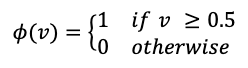

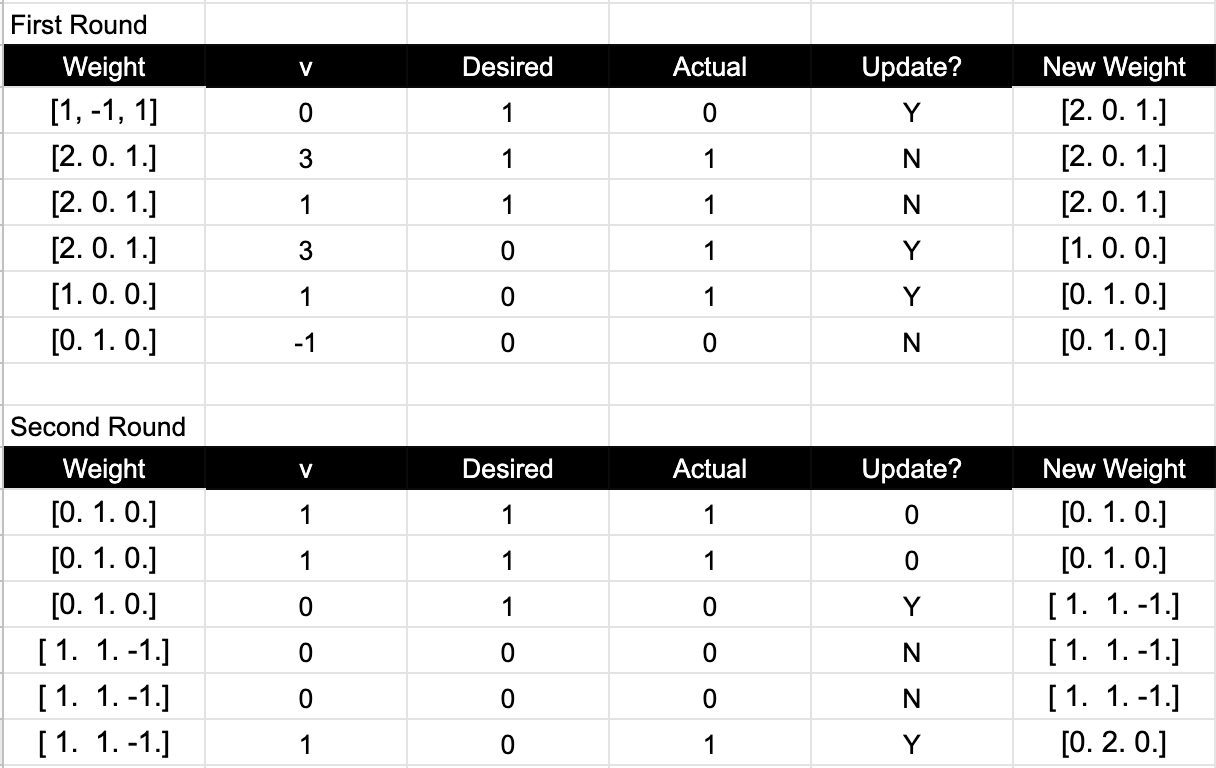

##### Question 5[2pts]
#### Assuming we have two sets of instances, which belong to two classes, with each class containing three instances. 
- C1={(1, 0), (1, 1), (0, -1)}; 
- C2={(0, 1), (-1, 0), (-1, -1)}. 

#### Assuming η=0.1, and the initial weights are 
- w0=1, w1=1, and w2=1. 

#### Please use gradient learning ruleto learn a linear decision surface for these two classes. List the results in the first two rounds by using tables in the following form(Please report the mean squared errors of all instances with respect to the initial weight values, and also report the mean squared errors E(W) AFTER the weight updating for each round).Mean squared errors E(W) before the first-round weight updating:

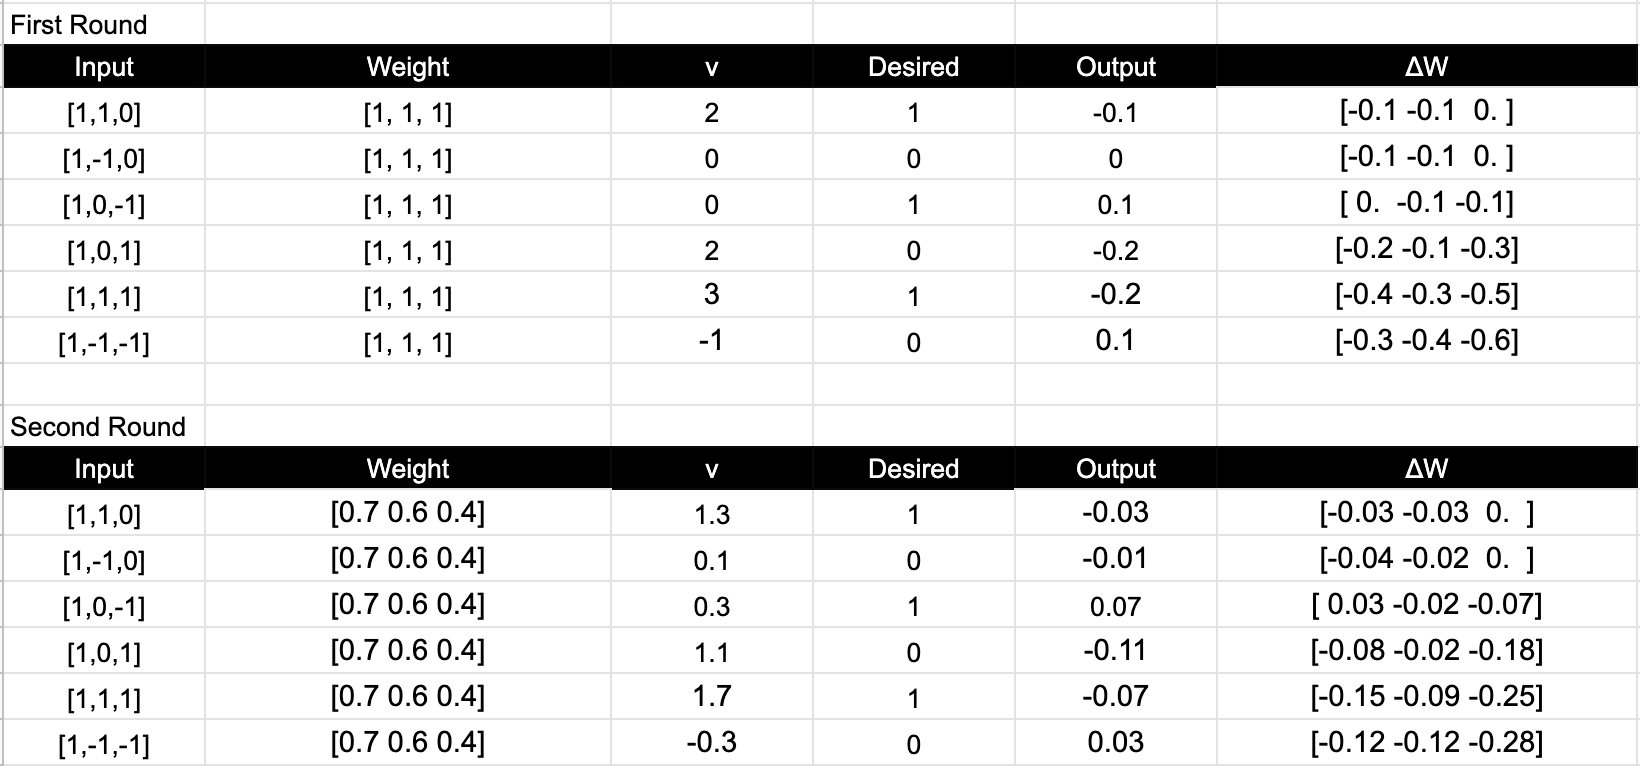
* New weight after first round:
> [0.7 0.6 0.4]

* Mean squared errors E(W) after the first-round weight updating:
>E(W) = 5.445

* New weight after second round:
>[0.58 0.48 0.12]

* Mean squared errors E(W) after the second-round weight updating:
>0.1983

#### Question 6[2pts]
#### Assuming we have two sets of instances, which belong to two classes, with each class containingthree instances. 
- C1={(1, 0), (1, 1), (0, -1)}; 
- C2={(0, 1), (-1, 0), (-1, -1)}. 

#### Assuming η=0.1, and the initial weights are 
- w0=1, w1=1, and w2=1. 

#### Please use Delta rule (AdaLine)to learn a linear decision surface for these two classes. List the results in the first round by using tables in the following form(Please report the mean squared errors of all instances with respect to the initial weight values, and also report the mean squared errors E(W) AFTERthe weight updating of the last instance).

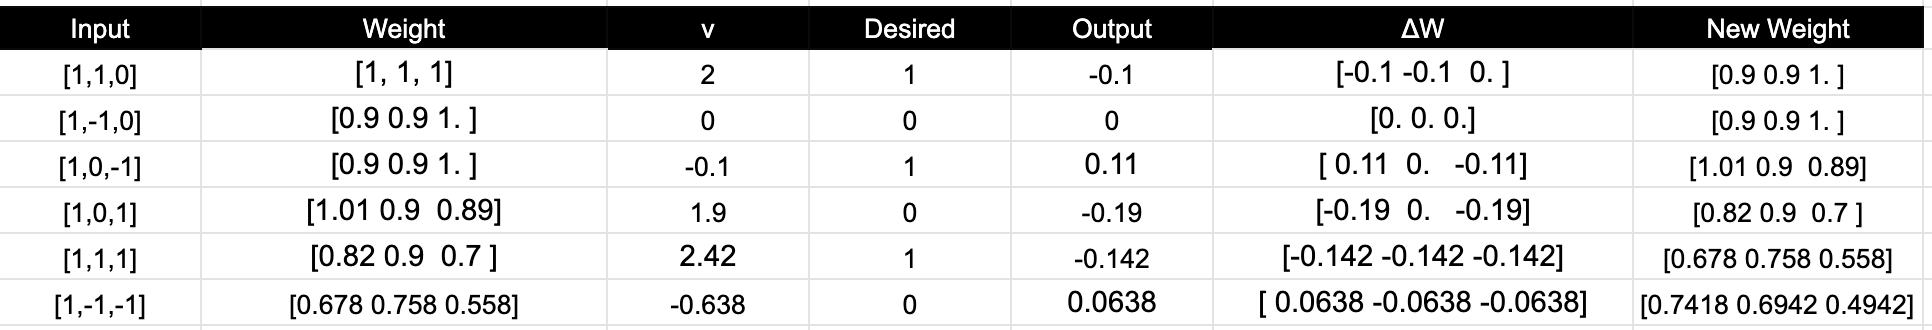
* Mean squared errors E(W) after the weight updating of the last instance:
> 1.6754

#### Question 7[1pt]
#### Class1Linear.txt and Class2Linear.txt files in the Canvas contain two-dimensional instances in two classes (C1and C2 respectively, with 70 instances in each class). In these two files, the first column denotes the x values and the second column represents the y values (separated by comma). Please use the Perceptron learning rule [Notebook, pdf] in the Canvas to report the following results:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time

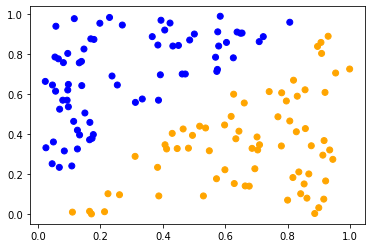

In [2]:
# Combine instances in the Class1Linear.txtand Class2Linear.txt files as one dataframe, 
# and label instances in Class1 as 1, and instances in Class2 as 0. 

class1_linear = pd.read_csv('Class1Linear.txt')
class1_linear['label'] = [1]*class1_linear.shape[0]
class2_linear = pd.read_csv('Class2Linear.txt')
class2_linear['label'] = [0]*class2_linear.shape[0]
data = pd.concat([class1_linear, class2_linear])

# Report the scatter plot of all 140 instances in the same plot, 
# using different color to show instance in different class [0.25 pt]
colors = ['blue', 'orange']
plt.scatter(data.iloc[:,0],data.iloc[:,1],color=[colors[i] for i in data.iloc[:,2]])
plt.show()

In [3]:
def perceptron(features, labels, learning_rate, threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    misclassified_ = []
    misclassified=1
    while misclassified!=0:
        misclassified = 0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            actual = 1.0 if (v >=  threshold) else 0
            delta = (labels[i] - actual)
            if(delta): # misclassified 
                misclassified += 1
                w =w+ (delta*x*learning_rate)
        misclassified_.append(misclassified) 
    return (w, misclassified_)

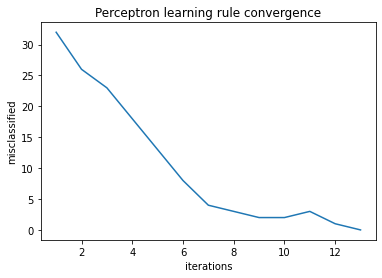

In [4]:
feature, label = data.iloc[:,0:-1], data.loc[:,['label']]

#convert dataframe into matrix format
features_m=np.asmatrix(feature, dtype = 'float64')
labels_m = np.asmatrix(label, dtype = 'float64')


# Use learning rate 0.01and report the error rates of the perceptron learning 
# with respect to different iterations (using a plot where the x-axis denotes the iterations, 
# and the y-axis shows the error rate. [0.25 pt]

learning_rate = 0.01
threshold = 0.5
w, misclassified= perceptron(features_m, labels_m, learning_rate, threshold)
epochs=np.arange(1,len(misclassified)+1)

plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title("Perceptron learning rule convergence")
plt.show()

In [5]:
# Report final perceptron weight values and the slope and 
# y-intercept of the decision surface [0.25 pt]
print(w)
slope = w[0,1]/w[0,2]*(-1)
intercept = w[0,0]/w[0,2]*(-1)+threshold/w[0,2]
print('slope:', slope)
print('intercept:', intercept)

[[ 0.49739303  0.14736742 -0.12339245]]
slope: 1.1942985520850804
intercept: -0.021127500363913754


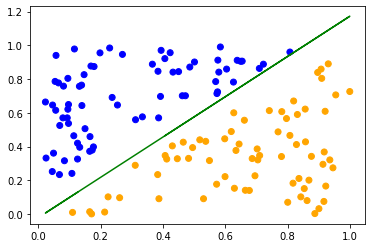

In [6]:
# Report the final decision surface on the same scatter plot 
# which shows the 140 instances [0.25 pt]
x = data.iloc[:,0]
y = x*slope+intercept
plt.scatter(data.iloc[:,0],data.iloc[:,1],color=[colors[i] for i in data.iloc[:,2]])
plt.plot(x,y,"g-")
plt.show()

#### Question 8[2.5pts]
#### Class1.txt and Class2.txt files in the Canvas contain two-dimensional instances in two classes (C1and C2respectively, with 100 instances in each class). The instances are not linearly separable. Revise code in the Gradient Descent Learning Notebook to implement following tasks. 

In [7]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels,threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w=np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_=[]
    totalSquaredErrTest_=[]
    accuracy_=[]
    epoch=0
    err=9999.0
    
    while(epoch<max_iter)and(err>err_threshold):
        misclassified=0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            
            diff=learning_rate*(labels[i]-v)
            deltaw=deltaw+diff*x
        
        #update weights
        w=w+deltaw
        
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            this_err=this_err+(labels[i]-v)*(labels[i]-v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]
        totalSquaredErr_.append(err)
        
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i]-v)*(test_labels[i]-v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            if((v>=threshold and test_labels[i]==0)or(v<threshold and test_labels[i]==1)):
                this_err=this_err+1
        this_err=float(this_err)
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)
        
        #next epoch
        epoch=epoch+1
    return(w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)
    

In [8]:
# Randomly select 80% instances from class1.txt and 80% instances from class2.txt 
# to train a perceptron classifier (using gradient descent learning rule), 
# and use the classifier to classify remaining 20% instances in class1.txt and class2.txt. 


class1=pd.read_csv("class1.txt")
class2=pd.read_csv("class2.txt")

class1.insert(class1.shape[1],'label',1)
class2.insert(class2.shape[1],'label',0)

class12=class1.append(class2)


features,labels=class12.iloc[:,0:-1],class12.loc[:,['label']]

X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=.2, random_state=42)

X_train_m=np.asmatrix(X_train, dtype='float64')
X_test_m=np.asmatrix(X_test, dtype='float64')
y_train_m=np.asmatrix(y_train, dtype='float64')
y_test_m=np.asmatrix(y_test, dtype='float64')



In [11]:
# Please report the classification accuracy of the perceptron classifier on the 20% test instances 
# (using learning rate=1/(# of training samples), 
# error threshold 0.01, 
# and iteration numbers 2,000) [0.5 pt]


learning_rate = 1/X_train.shape[0]
error_threshold = 0.01
iteration = 2000
threshold = 0.5

start_t = time.time()
w, misclassified, testError, accuracy = GradientDescentLearning(
    X_train_m, y_train_m, iteration, learning_rate, error_threshold,
    X_test_m, y_test_m, threshold
)
end_t = time.time()

print(accuracy[0:10])

[0.44999999999999996, 0.475, 0.6, 0.6, 0.625, 0.65, 0.7, 0.725, 0.775, 0.85]


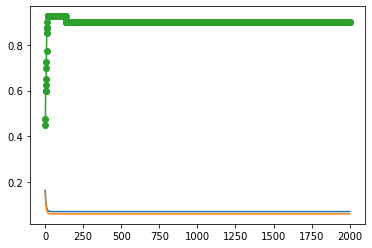

In [12]:
# Please report the training errors and test errors of the perceptron classifier
# with respect to each iteration. 
# Please show the two error rates on the same chart, where the x-axis denotes the iteration 
# and the y-axis denotes the mean classification errors [0.5 pt]

epochs=np.arange(1, iteration+1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.plot(epochs, accuracy,marker='o')

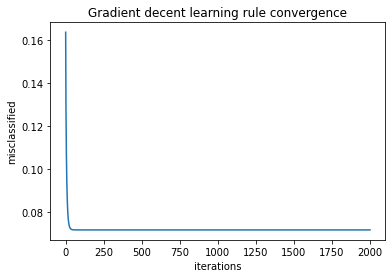

Runtime: 33.040425 seconds


In [13]:

plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title("Gradient decent learning rule convergence")
plt.show()
print('Runtime: %f seconds'%(end_t-start_t))

1.0202470700832384 0.0790470049543166


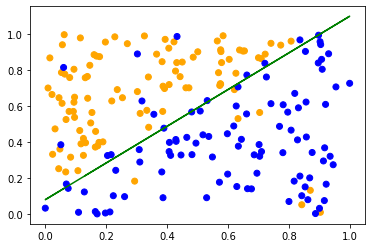

In [14]:
# Report the final decision surface on the same scatter plot which shows the 200instances [0.5pt]
slope=w[0,1]/w[0,2]*(-1)
intercept=threshold/w[0,2]-w[0,0]/w[0,2]
print(slope,intercept)

xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")

In [15]:
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold,threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w=np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_=[]
    epoch=0
    err=9999.0
    while(epoch<max_iter)and(err>err_threshold):
        misclassified=0
        deltaw=[0]*(features.shape[1]+1)
        
        # random select an instance
        i=random.randrange(features.shape[0])
        x=features[i,]
        x=np.insert(x,0,1)
        
        v=np.dot(w, x.transpose())
        
        diff=learning_rate*(labels[i]-v)
        deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        this_err=0
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            this_err=this_err+(labels[i]-v)*(labels[i]-v)
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        epoch=epoch+1
    return(w, totalSquaredErr_)

In [16]:
# Revise Delta learning rule in the Gradient Descent Learning Notebook 
# to learn from the same 80% of training samples 
# (using learning rate =0.01, 
#  error threshold 0.01, 
#  and iteration numbers 2,000).
# Report the training errors as a plot, where the x-axis denotes the iteration
# and the y-axis denotes the mean classification errors [0.5 pt]
max_iter=2000
eta=0.01
err_threshold=0.01
start_t = time.time()
w, misclassified=Delta(X_train_m, y_train_m, max_iter, eta, err_threshold,threshold)
end_t = time.time()

/Users/eva/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


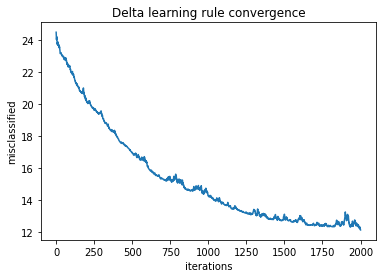

Runtime: 13.801308 seconds


In [18]:
epochs=np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title("Delta learning rule convergence")
plt.show()
print('Runtime: %f seconds'%(end_t-start_t))

In [ ]:
# Compare Delta learningrule and Gradient Descent Learning rule, 
# explain advantage and disadvantage of each of them, respectively [0.5 pt]

|Rule| Gradient Descent  | Delta  |
|:-:|:-:|:-:|
|Runtime| 33.0 sec  | 13.8 sec  |
|Convergence|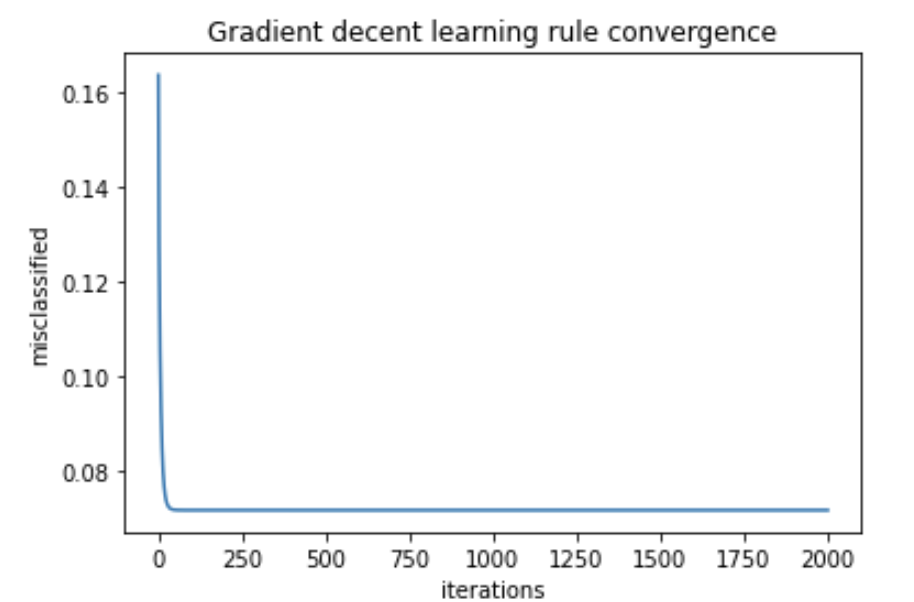   |  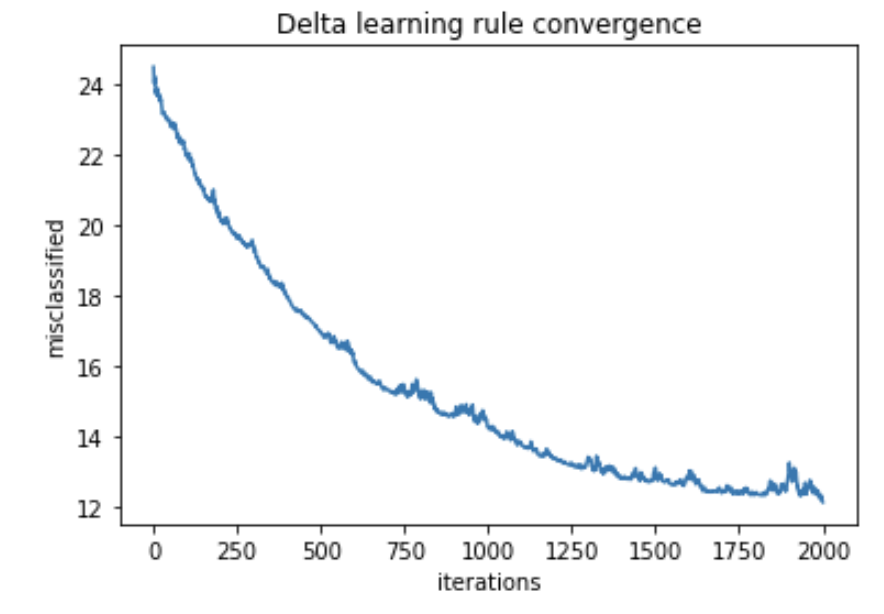 |

> Gradient Descent Learning rule convergents in significant less iteration. On the other hand, Delta rule's accuracy is volatile and requires more iteration to converge, but its runtime is significant lower than the runtime of Gradient Descent Leraning rule. To sum up, the advantage of Gradient Descent Learning rule is more stable, but it takes more computational power. The advantage of Delta rule is efficiency, but it is not as stable as Gradient Descent Learning rule.

In [31]:
#Q4
features = np.asmatrix([[1,0],[1,1],[0,-1],[0,1],[-1,0],[-1,-1]], dtype = 'float64')
labels = [1,1,1,0,0,0]
learning_rate = 1
threshold = 0.5
def perceptron_learning(features, labels, learning_rate, threshold):
    w = [1,-1, 1]
    misclassified_ = []
    misclassified=1
    while misclassified!=0:
        misclassified = 0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            actual = 1.0 if (v >=  threshold) else 0
            
            delta = (labels[i] - actual)
            print(i, 'weight',w, '| V:', v, '| D:',labels[i], '| A:',actual, '| Update:',delta)
            if (delta):
                misclassified += 1
                w =w+ (delta*x*learning_rate)
            print('new weight: ', w)
            print('--------------------- end', i)
        misclassified_.append(misclassified) 
    return (w, misclassified_)
perceptron_learning(features,labels,learning_rate, threshold)

0 weight [1, -1, 1] | V: [[0.]] | D: 1 | A: 0 | Update: 1
in delta 1
new weight:  [[2. 0. 1.]]
--------------------- end 0
1 weight [[2. 0. 1.]] | V: [[3.]] | D: 1 | A: 1.0 | Update: 0.0
new weight:  [[2. 0. 1.]]
--------------------- end 1
2 weight [[2. 0. 1.]] | V: [[1.]] | D: 1 | A: 1.0 | Update: 0.0
new weight:  [[2. 0. 1.]]
--------------------- end 2
3 weight [[2. 0. 1.]] | V: [[3.]] | D: 0 | A: 1.0 | Update: -1.0
in delta -1.0
new weight:  [[1. 0. 0.]]
--------------------- end 3
4 weight [[1. 0. 0.]] | V: [[1.]] | D: 0 | A: 1.0 | Update: -1.0
in delta -1.0
new weight:  [[0. 1. 0.]]
--------------------- end 4
5 weight [[0. 1. 0.]] | V: [[-1.]] | D: 0 | A: 0 | Update: 0
new weight:  [[0. 1. 0.]]
--------------------- end 5
0 weight [[0. 1. 0.]] | V: [[1.]] | D: 1 | A: 1.0 | Update: 0.0
new weight:  [[0. 1. 0.]]
--------------------- end 0
1 weight [[0. 1. 0.]] | V: [[1.]] | D: 1 | A: 1.0 | Update: 0.0
new weight:  [[0. 1. 0.]]
--------------------- end 1
2 weight [[0. 1. 0.]] | 

(matrix([[ 1.,  2., -1.]]), [3, 2, 1, 0])

In [41]:
#Q5
# features = np.asmatrix([[1,0],[1,1],[0,-1],[0,1],[-1,0],[-1,-1]], dtype = 'float64')
features = np.asmatrix([[1,0],[-1,0],[0,-1],[0,1],[1,1],[-1,-1]], dtype = 'float64')
labels = [1,0,1,0,1,0]
learning_rate = 0.1
threshold = 0.5
def GradientDescentLearning(features, labels, learning_rate):
    # random initialize weight values between rage: [-0.5,0.5]
    w=[1,1,1]
    
    totalSquaredErr_=[]
    sum_out = 0
    sum_d = 0
    #totalSquaredErrTest_=[]
    #accuracy_=[]
    #epoch=0
    #err=9999.0
    
    for each_round in range(13):
        
        misclassified=0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            
            diff=learning_rate*(labels[i]-v)
            deltaw=deltaw+diff*x
            sum_out += diff
            sum_d += labels[i]
            print('input',x, 'weight',w, '| V:', v, '| D:',labels[i])
            print('| Output:',diff, '| deltaW:',deltaw)
        print('E(W):',0.5*(sum_d-sum_out)**2)
        #update weights
        w=w+deltaw
        
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            this_err=this_err+(labels[i]-v)*(labels[i]-v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]
        totalSquaredErr_.append(err)
        print('totalSquaredErr', totalSquaredErr_[-1])
        print('----------------end', each_round)
        # now calculate test error using new weights
#         this_err=0
#         for i, x in enumerate(test_features):
#             x=np.insert(x,0,1)
#             v=np.dot(w, x.transpose())
#             this_err=this_err+(test_labels[i]-v)*(test_labels[i]-v)
#         this_err=np.ndarray.item(this_err)
#         this_err=this_err/2.0
#         totalSquaredErrTest_.append(this_err/test_features.shape[0])
        
#         # now calculate test classification accuracy
#         this_err=0
#         for i, x in enumerate(test_features):
#             x=np.insert(x,0,1)
#             v=np.dot(w, x.transpose())
#             if((v>=threshold and test_labels[i]==0)or(v<threshold and test_labels[i]==1)):
#                 this_err=this_err+1
#         this_err=float(this_err)
#         this_err=this_err/test_features.shape[0]
#         accuracy_.append(1-this_err)
        
#         #next epoch
#         epoch=epoch+1
    return(w, totalSquaredErr_)
w, total_SE = GradientDescentLearning(features, labels, learning_rate)

input [[1. 1. 0.]] weight [1, 1, 1] | V: [[2.]] | D: 1
| Output: [[-0.1]] | deltaW: [[-0.1 -0.1  0. ]]
input [[ 1. -1.  0.]] weight [1, 1, 1] | V: [[0.]] | D: 0
| Output: [[0.]] | deltaW: [[-0.1 -0.1  0. ]]
input [[ 1.  0. -1.]] weight [1, 1, 1] | V: [[0.]] | D: 1
| Output: [[0.1]] | deltaW: [[ 0.  -0.1 -0.1]]
input [[1. 0. 1.]] weight [1, 1, 1] | V: [[2.]] | D: 0
| Output: [[-0.2]] | deltaW: [[-0.2 -0.1 -0.3]]
input [[1. 1. 1.]] weight [1, 1, 1] | V: [[3.]] | D: 1
| Output: [[-0.2]] | deltaW: [[-0.4 -0.3 -0.5]]
input [[ 1. -1. -1.]] weight [1, 1, 1] | V: [[-1.]] | D: 0
| Output: [[0.1]] | deltaW: [[-0.3 -0.4 -0.6]]
E(W): [[5.445]]
totalSquaredErr 0.19833333333333333
----------------end 0
input [[1. 1. 0.]] weight [[0.7 0.6 0.4]] | V: [[1.3]] | D: 1
| Output: [[-0.03]] | deltaW: [[-0.03 -0.03  0.  ]]
input [[ 1. -1.  0.]] weight [[0.7 0.6 0.4]] | V: [[0.1]] | D: 0
| Output: [[-0.01]] | deltaW: [[-0.04 -0.02  0.  ]]
input [[ 1.  0. -1.]] weight [[0.7 0.6 0.4]] | V: [[0.3]] | D: 1
| Outp

In [48]:
#Q6
features = np.asmatrix([[1,0],[-1,0],[0,-1],[0,1],[1,1],[-1,-1]], dtype = 'float64')
labels = [1,0,1,0,1,0]
learning_rate = 0.1
threshold = 0.5
def Delta(features, labels, learning_rate):
    # random initialize weight values between rage: [-0.5,0.5]
    w=[1,1,1]
    
    totalSquaredErr_=[]
    
    for i in range(6):
        misclassified=0
        deltaw=[0]*(features.shape[1]+1)
        
        # random select an instance
        #i=random.randrange(features.shape[0])
        x=features[i]
        x=np.insert(x,0,1)
        
        v=np.dot(w, x.transpose())
        
        diff=learning_rate*(labels[i]-v)
        deltaw=deltaw+diff*x
        print('input',x, 'weight',w, '| V:', v, '| D:',labels[i])
        print('| Output:',diff, '| deltaW:',deltaw)
        #update weights
        #print(deltaw)
        w=w+deltaw
        print('new weight:', w)
        this_err=0
        for i, x in enumerate(features):
            x=np.insert(x,0,1)
            v=np.dot(w, x.transpose())
            this_err=this_err+(labels[i]-v)*(labels[i]-v)
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        #epoch=epoch+1
    return(w, totalSquaredErr_)
w, totalSquaredErr_ = Delta(features, labels, learning_rate)
print(totalSquaredErr_)

input [[1. 1. 0.]] weight [1, 1, 1] | V: [[2.]] | D: 1
| Output: [[-0.1]] | deltaW: [[-0.1 -0.1  0. ]]
new weight: [[0.9 0.9 1. ]]
input [[ 1. -1.  0.]] weight [[0.9 0.9 1. ]] | V: [[0.]] | D: 0
| Output: [[0.]] | deltaW: [[0. 0. 0.]]
new weight: [[0.9 0.9 1. ]]
input [[ 1.  0. -1.]] weight [[0.9 0.9 1. ]] | V: [[-0.1]] | D: 1
| Output: [[0.11]] | deltaW: [[ 0.11  0.   -0.11]]
new weight: [[1.01 0.9  0.89]]
input [[1. 0. 1.]] weight [[1.01 0.9  0.89]] | V: [[1.9]] | D: 0
| Output: [[-0.19]] | deltaW: [[-0.19  0.   -0.19]]
new weight: [[0.82 0.9  0.7 ]]
input [[1. 1. 1.]] weight [[0.82 0.9  0.7 ]] | V: [[2.42]] | D: 1
| Output: [[-0.142]] | deltaW: [[-0.142 -0.142 -0.142]]
new weight: [[0.678 0.758 0.558]]
input [[ 1. -1. -1.]] weight [[0.678 0.758 0.558]] | V: [[-0.638]] | D: 0
| Output: [[0.0638]] | deltaW: [[ 0.0638 -0.0638 -0.0638]]
new weight: [[0.7418 0.6942 0.4942]]
[4.85, 4.85, 4.5365, 3.1172, 1.9468359999999996, 1.6754435599999997]


/Users/eva/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
